## 1ソリトン解

In [7]:
# scipy.sparse.csr_matrix
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html
from scipy.integrate import solve_ivp
import importlib

import numpy as np
import matplotlib.pyplot as plt

import differential, equation, animation
importlib.reload(differential)
# from differential import make_differential_ops
importlib.reload(equation)
from equation import *
importlib.reload(animation)
from animation import *

In [3]:
def main(name:str="kdv_solve_ivp"):
    # Load results
    npz = np.load(f"../out/{name}.npz")
    print("npz.files =", npz.files)

    x = npz['x']
    t = npz['t']
    u_tx = npz['u_tx']
    print("x.shape =", x.shape)
    print("t.shape =", t.shape)
    print("u_tx.shape =", u_tx.shape)

    # make an animation
    print("Making animation...")
    make_animation(
        x, t, u_tx, ymin=-1.5, ymax=3.0, 
        filename=f"../out/{name}.gif"
        )

dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 44406
 Minimum time step    : 0.00013731122879079294
 Maximum time step    : 0.00026768816519399247
dt = 0.05
shape of u(t, x) : (101, 100)


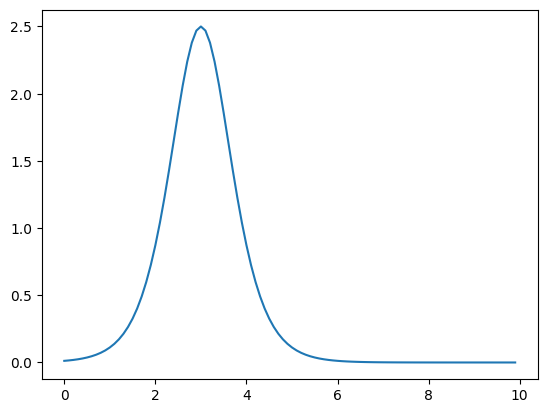

In [5]:
if __name__ == "__main__":
    solve_soliton(soliton, [3, 5])

npz.files = ['x', 't', 'u_tx']
x.shape = (100,)
t.shape = (101,)
u_tx.shape = (101, 100)
Making animation...
saved as '../out/kdv_solve_ivp.gif'


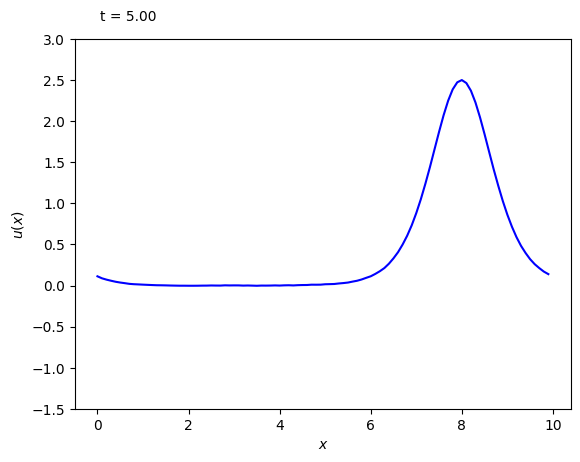

In [7]:
main()

## 2つのソリトン解

dx= 0.1
Solving equation...
The solver successfully reached the end of the integration interval.
 Number of time steps : 44016
 Minimam time step    : 1.4334445488373149e-05
 Maximum time step    : 0.00033399637369688673
dt = 0.05
shape of u(t, x) : (101, 100)


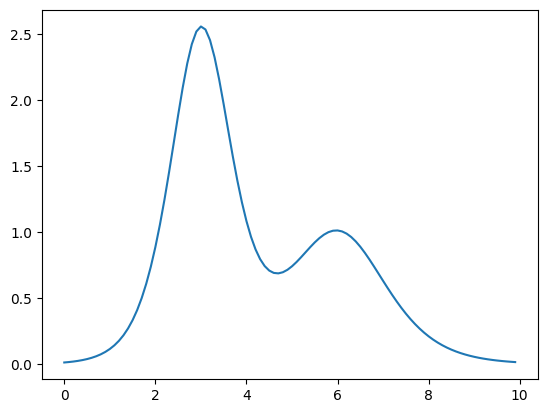

In [25]:
if __name__ == "__main__":
    solve_soliton(
        two_soliton, [3., 5., 6., 2], "solve_two_soliton.npz",
        )

npz.files = ['x', 't', 'u_tx']
x.shape = (100,)
t.shape = (101,)
u_tx.shape = (101, 100)
Making animation...
saved as '../out/solve_two_soliton.gif'


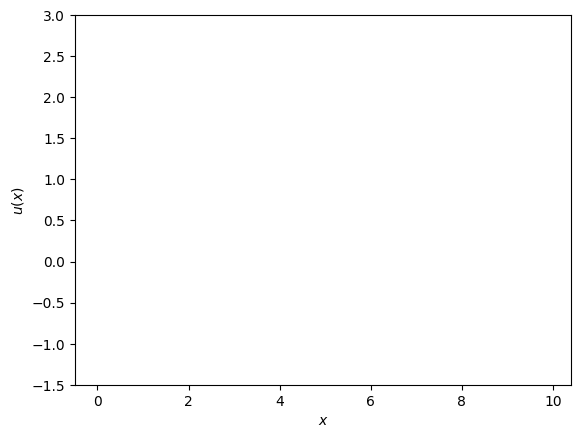

In [26]:
main("solve_two_soliton")